<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame_20250623_AutoML_%E9%A0%90%E6%B8%AC%E8%B3%87%E6%96%99(Heart)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [9]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = None
# eval_metric = 'r2'

# data_filename 預測資料來源的檔名
data_filename = '/dataset/Heart_Test.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/Heart_Test_prediction.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_heart'


### 環境設定

In [1]:
environment_type = 1
#檢查執行環境是不是Colab
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ct

### 載入資料

In [3]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
1,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
4,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
96,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
97,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
98,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


### 載入模型

In [7]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [10]:
import pickle
with open(environment_base_folder+model_path+'/used_field.bin', 'rb') as handle:
  used_field = pickle.load(handle)

input_field = used_field['input_field']
target_field = used_field['target_field']
working_field = input_field.copy()
working_field.append(target_field)

model = TabularPredictor.load(environment_base_folder+model_path)

# 輸出預測結果

In [11]:
prediction_p = None
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [13]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_csv(environment_base_folder+prediction_filename)

# 評估分數

In [14]:
model.evaluate(data)

{'roc_auc': np.float64(0.897745571658615),
 'accuracy': 0.86,
 'balanced_accuracy': np.float64(0.8590982286634461),
 'mcc': np.float64(0.7181964573268921),
 'f1': 0.8703703703703703,
 'precision': 0.8703703703703703,
 'recall': 0.8703703703703703}

# 欄位重要性

In [15]:
output = ''
if target_field in data:
    output = model.feature_importance(data)
output

,importance,stddev,p_value,n,p99_high,p99_low
ca,0.027295,0.029452,0.053477,5,0.087937,-0.033347
cp,0.023349,0.009914,0.003114,5,0.043763,0.002936
thal,0.022383,0.017628,0.023450,5,0.058679,-0.013912
sex,0.019887,0.005144,0.000493,5,0.030480,0.009295
thalach,0.009179,0.009026,0.042681,5,0.027764,-0.009406
exang,0.007407,0.001575,0.000231,5,0.010650,0.004165
oldpeak,0.006280,0.008618,0.089278,5,0.024025,-0.011465
restecg,0.006280,0.003351,0.006902,5,0.013181,-0.000620
slope,0.005717,0.008547,0.104536,5,0.023314,-0.011881
trestbps,0.003784,0.004257,0.058867,5,0.012549,-0.004980


# 圖表 - 分類問題

## ROC Curve

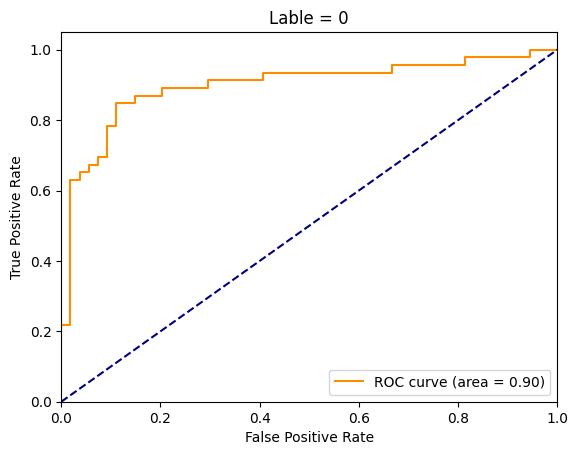

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = model.class_labels

if target_field in data:
    if (model.problem_type != 'regression'):
        if (model.problem_type == 'binary'):
            class_labels = [class_labels[0]]

        for n,label in enumerate(class_labels):
            roc_score = roc_auc_score(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            fpr, tpr, thresholds = metrics.roc_curve(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            plt.figure()
            plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_score)
            plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Lable = "+str(label))
            plt.legend(loc="lower right")
            plt.show()

## Confusion Matrix

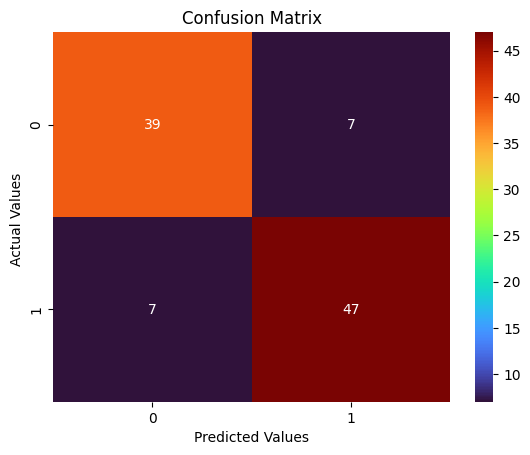

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

if target_field in data:
    if (model.problem_type != 'regression'):
        conf_matrix = (confusion_matrix(data[target_field], prediction))
        conf_matrix_df = pd.DataFrame(conf_matrix, model.class_labels, model.class_labels)
        conf_matrix_df

        fx = sns.heatmap(conf_matrix_df, annot=True, cmap='turbo', fmt='d')

        fx.set_title('Confusion Matrix')
        fx.set_xlabel('Predicted Values')
        fx.set_ylabel('Actual Values ')

# 圖表 - 回歸問題

In [18]:
import seaborn as sns

if target_field in data:
    if (model.problem_type == 'regression'):
        sns.regplot(x = data[target_field], y = prediction)
        plt.xlabel("real")
        plt.ylabel("prediction")